In [21]:
library(umap)
library(ggplot2)
# library(ggthemes)

In [1]:
sce_R_filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/all_da_d52_cells_sce.Rds"
sce = readRDS(file = sce_R_filename)

In [3]:
sce

class: SingleCellExperiment 
dim: 32738 79801 
metadata(0):
assays(1): counts
rownames(32738): MIR1302-10 FAM138A ... AC002321.2 AC002321.1
rowData names(0):
colnames(79801): CCAGCGAGTTACTGAC-1-64 ACGCAGCGTTCGCTAA-1-45 ...
  CTTAGGAAGATTACCC-1-13 TCAACGACATAGAAAC-1-39
colData names(21): batch celltype ... treatment index
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [16]:
unique(sce$treatment)

[1] "NONE" "ROT"

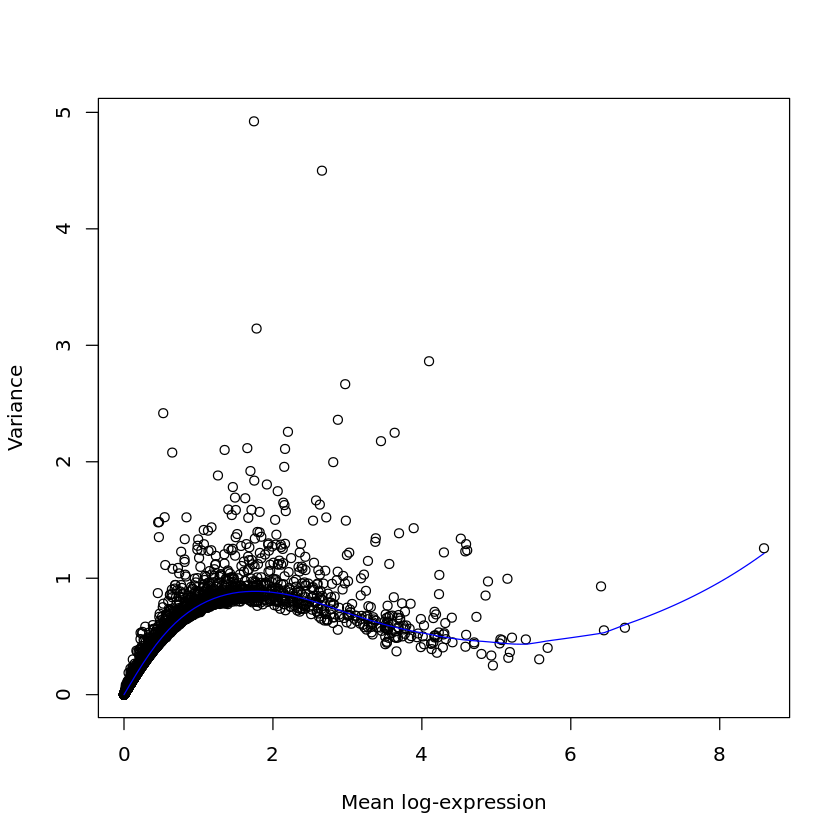

In [4]:
sce <- scater::logNormCounts(sce)
dec1 <- scran::modelGeneVar(sce)
plot(dec1$mean, dec1$total, xlab="Mean log-expression", ylab="Variance")
curve(metadata(dec1)$trend(x), col="blue", add=TRUE)

In [10]:
top.3000.hvgs = dec1[order(dec1$bio, decreasing = TRUE),][1:3000,]

In [12]:
head(rownames(top.3000.hvgs))

[1] "CCK"  "NNAT" "SCG2" "TAC1" "DLK1" "MEG3"

In [15]:
write.csv(data.frame(gene = rownames(top.3000.hvgs)), "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/top_3000hvgs_da_d52_alldonors.csv", quote = F, row.names=F)

In [20]:
pca.3000hvgs = prcomp(t(logcounts(sce)[rownames(top.3000.hvgs),]))$x
head(pca.3000hvgs)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC2991,PC2992,PC2993,PC2994,PC2995,PC2996,PC2997,PC2998,PC2999,PC3000
CCAGCGAGTTACTGAC-1-64,-10.6573526,-4.641860,-4.074279,-3.873247,-7.2274502,-0.5924088,1.471023,-1.2393711,-0.2906402,-0.8470182,...,-0.020705656,-0.01453222,0.007705675,-0.008384482,-0.011136088,-0.005946228,-0.004375058,0.0134420568,0.012847126,-0.018111245
ACGCAGCGTTCGCTAA-1-45,14.8151403,-14.206381,-2.292492,-5.286155,-1.8268812,-1.4689776,-5.928257,0.9466193,4.9965908,2.3809786,...,-0.017790590,0.01789913,0.001888761,0.043715478,-0.014169280,-0.005286548,0.303188950,0.0414103229,-0.008338138,0.013213986
ACGTCAAGTCTAGCCG-1-51,14.6078852,-7.826837,-3.090617,-7.518724,-0.2261420,-0.9213699,-2.829942,2.2496694,-2.4451553,2.3083797,...,0.043746442,-0.02406171,-0.011051092,0.112399444,0.019778716,0.003376784,0.237593449,0.0364292236,-0.006700420,-0.020163059
GACACGCGTGTGAAAT-1-19,-0.8246831,-1.257570,3.630958,6.127525,0.2799976,-1.4111907,-1.362456,1.3504409,2.1807971,1.5849406,...,0.009232601,-0.01746192,-0.003625713,0.019729159,0.006529037,0.018909276,-0.015503997,-0.0001181796,0.006017106,0.001463926
CGTCTACGTCGGGTCT-1-35,2.1446314,-3.965692,-2.952080,-3.514339,-7.2730340,-1.4476777,3.979937,-5.9757674,-0.3151858,0.1412313,...,0.040593408,0.01434332,0.014259218,-0.005252972,0.002069880,-0.008805146,-0.008926645,0.0289819049,0.017992248,0.033410244
AAATGCCTCGGATGGA-1-53,15.1045543,-11.016665,-1.039849,-7.449626,-0.6691763,0.4670667,-3.971954,-0.4271838,-2.4165513,1.1593411,...,0.004161533,-0.02326385,-0.009897457,0.079253949,0.021656272,-0.002457507,0.018470106,0.0369375828,0.013230462,-0.002480237


In [22]:
umap = umap(pca.3000hvgs[,1:50])

In [23]:
df_umap = data.frame(umap$layout)
colnames(df_umap) = c("UMAP1","UMAP2")
head(df_umap,2)

,UMAP1,UMAP2
CCAGCGAGTTACTGAC-1-64,-6.579721,3.70266
ACGCAGCGTTCGCTAA-1-45,4.721452,-2.66043


In [24]:
df_umap$treatment = sce$treatment

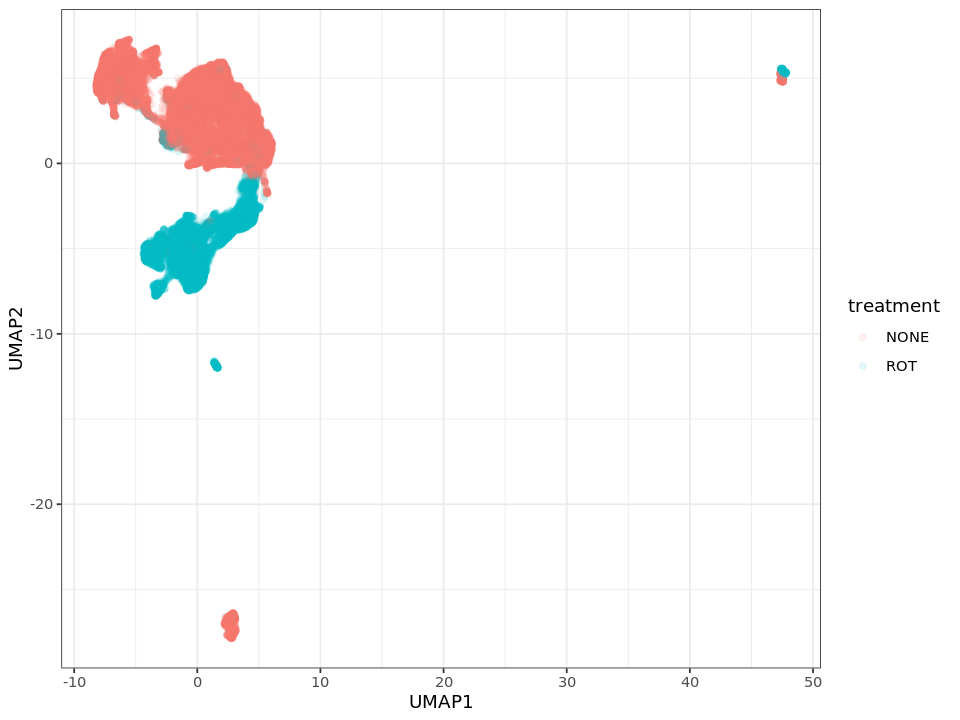

In [25]:
options(repr.plot.width = 8, repr.plot.height = 6)
p = ggplot(df_umap, aes(x = UMAP1, y = UMAP2, col = treatment)) + geom_point(alpha = 0.1) + theme_bw()
# p = p + scale_color_canva(palette = "Pool party") 
p

In [ ]:
df_sel = df_umap0[df_umap0$UMAP1>3 & df_umap0$UMAP2< -5,]
# df_sel = df_umap0[df_umap0$UMAP1>-2.5 & df_umap0$UMAP1< 2.5 & df_umap0$UMAP2< -5,]
# df_sel = df_umap0[df_umap0$UMAP1>0 & df_umap0$UMAP1< 3 & df_umap0$UMAP2> -2 & df_umap0$UMAP2< 2.5,]
cells_sel = rownames(df_sel)
length(cells_sel)
head(cells_sel)